In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [60]:
from pandas import datetime

def parser(x):
    return pd.to_datetime(x)

data = pd.read_csv('D:/Study/DataScience/TimeSeries/visitors.csv', index_col = 0, parse_dates= [0], date_parser = parser)

data.head()

,Australia,"China, People's Republic of",Japan,United Kingdom
Date,,,,
1998-10-01,20288,1089,5938,13831
1999-01-01,22047,1492,6925,23271
1999-04-01,14362,1450,4353,9756
1999-07-01,15775,1551,6855,7899
1999-10-01,21209,2020,6216,15778


In [61]:
data.drop(columns=["Australia", "China, People's Republic of", "Japan"], inplace= True)

In [62]:
data.head()

,United Kingdom
Date,
1998-10-01,13831
1999-01-01,23271
1999-04-01,9756
1999-07-01,7899
1999-10-01,15778


In [63]:
data = data.rename(columns={'United Kingdom': 'UK'})

In [64]:
data.head()

,UK
Date,
1998-10-01,13831
1999-01-01,23271
1999-04-01,9756
1999-07-01,7899
1999-10-01,15778


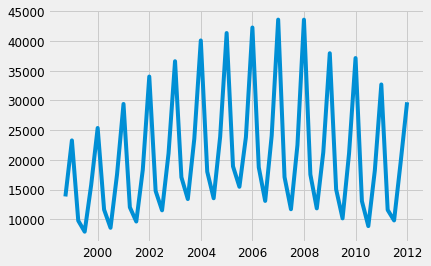

In [65]:
plt.plot(data)

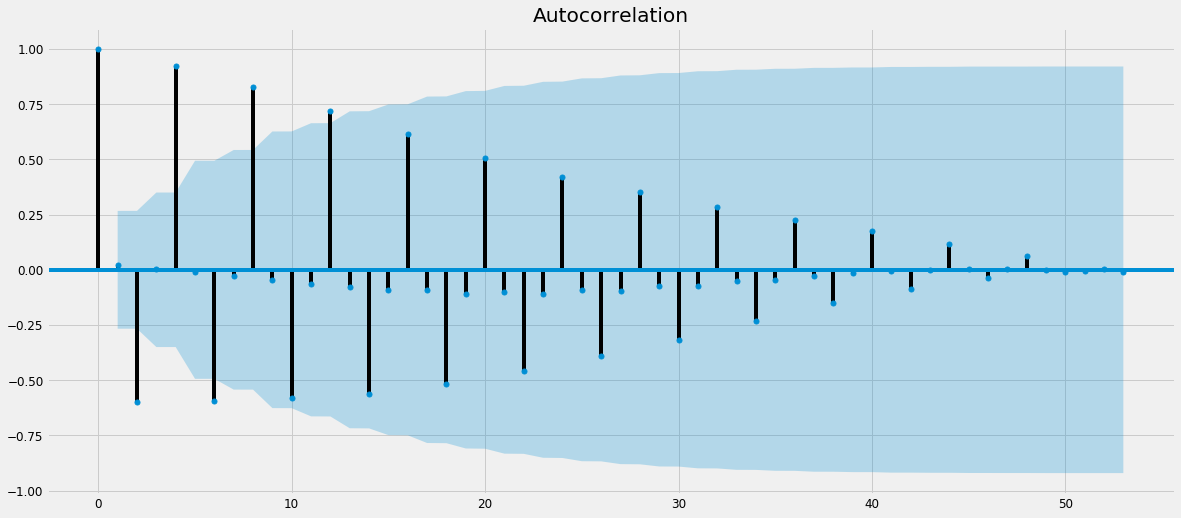

<Figure size 1440x720 with 0 Axes>

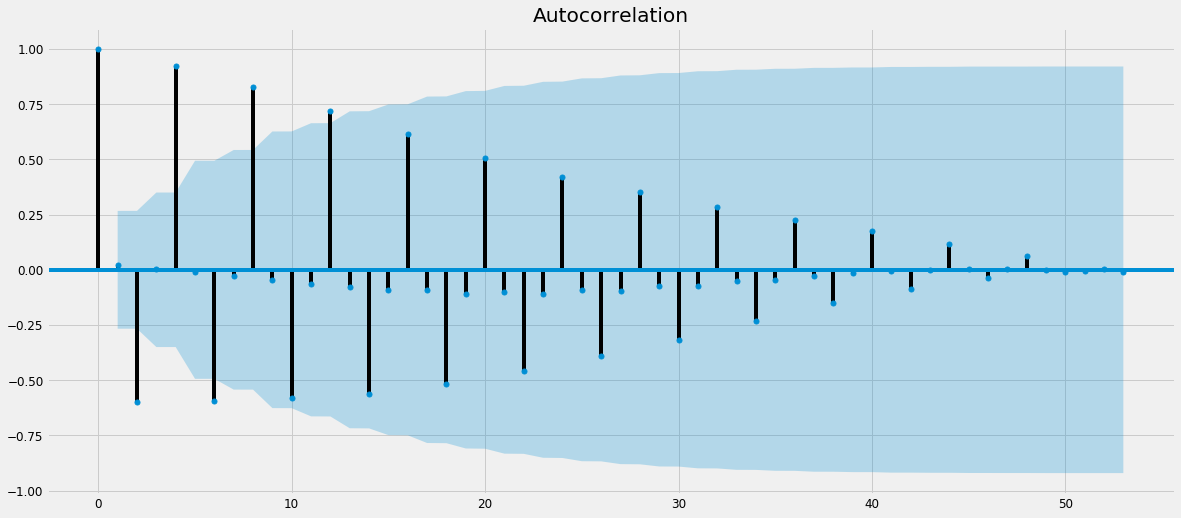

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,10))
plot_acf(data)

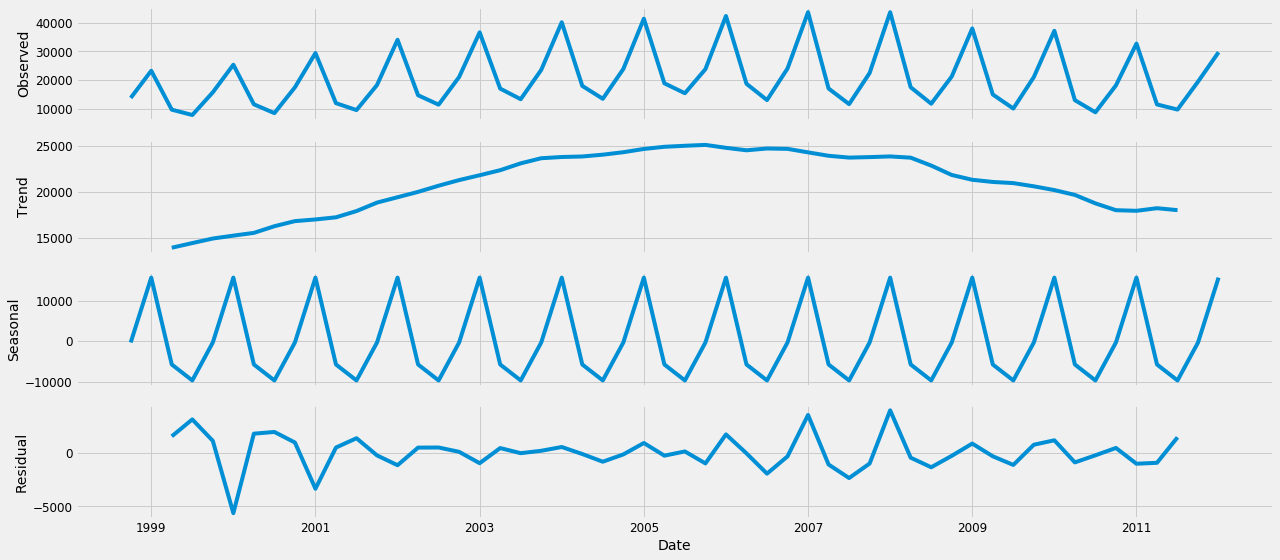

In [66]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [82]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

min_aic[0] = 1000
opt_param = []
opt_sea_param = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=param_seasonal, 
                                 enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            
            print('ARIMA{}x{}x4 - AIC:{}'.format(param, param_seasonal, results.aic))
            if (results.aic < min_aic[0]):
                min_aic[0] = results.aic
                opt_param.append(param)
                opt_sea_param.append(param_seasonal)
        except:
            continue
print('\n')            
print('Minimum AIC: {}'.format(np.round(min_aic[0],2)))
print('Optimal ARIMA Parameters: {}'.format(opt_param[-1]))
print('Optimal Seasonal Parameters: {}'.format(opt_sea_param[-1]))

ARIMA(0, 0, 0)x(0, 0, 0, 4)x4 - AIC:1218.2004284759464
ARIMA(0, 0, 0)x(0, 0, 1, 4)x4 - AIC:1070.9766361953864
ARIMA(0, 0, 0)x(0, 1, 0, 4)x4 - AIC:890.9890428053164
ARIMA(0, 0, 0)x(0, 1, 1, 4)x4 - AIC:815.2228503550334
ARIMA(0, 0, 0)x(1, 0, 0, 4)x4 - AIC:910.6862591873139
ARIMA(0, 0, 0)x(1, 0, 1, 4)x4 - AIC:888.1903505731763
ARIMA(0, 0, 0)x(1, 1, 0, 4)x4 - AIC:823.6164569928566
ARIMA(0, 0, 0)x(1, 1, 1, 4)x4 - AIC:800.3060461791845
ARIMA(0, 0, 1)x(0, 0, 0, 4)x4 - AIC:1170.485213854896
ARIMA(0, 0, 1)x(0, 0, 1, 4)x4 - AIC:1062.945586670183
ARIMA(0, 0, 1)x(0, 1, 0, 4)x4 - AIC:856.9304062577568
ARIMA(0, 0, 1)x(0, 1, 1, 4)x4 - AIC:784.0002959215998
ARIMA(0, 0, 1)x(1, 0, 0, 4)x4 - AIC:894.6008590743628
ARIMA(0, 0, 1)x(1, 0, 1, 4)x4 - AIC:857.2631921127869
ARIMA(0, 0, 1)x(1, 1, 0, 4)x4 - AIC:817.0916298944222
ARIMA(0, 0, 1)x(1, 1, 1, 4)x4 - AIC:775.7147818117935
ARIMA(0, 1, 0)x(0, 0, 0, 4)x4 - AIC:1144.7849025495477
ARIMA(0, 1, 0)x(0, 0, 1, 4)x4 - AIC:1029.6139418994335
ARIMA(0, 1, 0)x(0, 1, 0,

In [84]:
mod = sm.tsa.statespace.SARIMAX(data, order=(1,1,1), seasonal_order=(0,1,0,4), 
                                enforce_stationarity=False,enforce_invertibility=False)

results = mod.fit()

In [85]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2213      0.191      1.156      0.248      -0.154       0.597
ma.L1         -0.7872      0.119     -6.588      0.000      -1.021      -0.553
sigma2      2.534e+06   4.48e+05      5.657      0.000    1.66e+06    3.41e+06


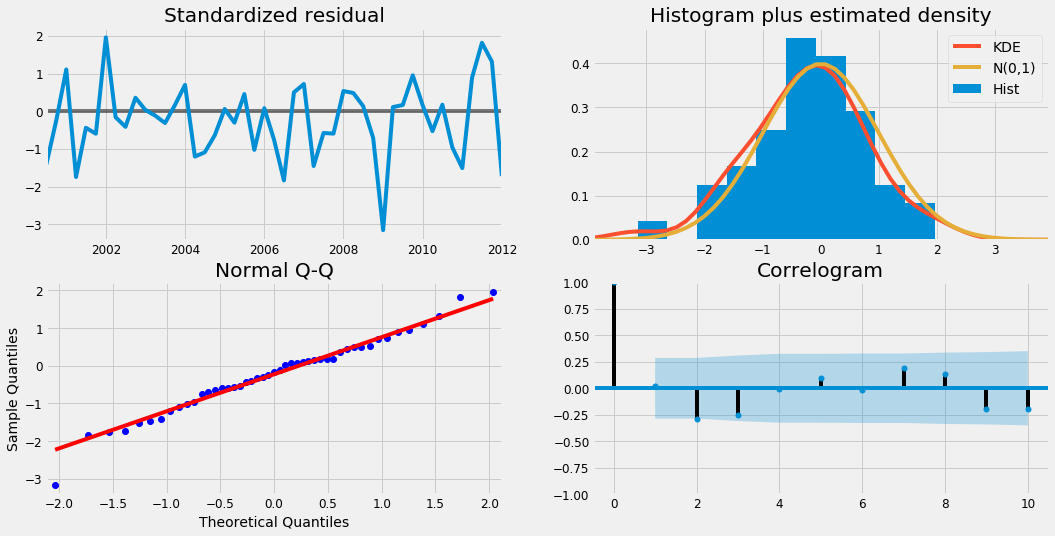

In [86]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

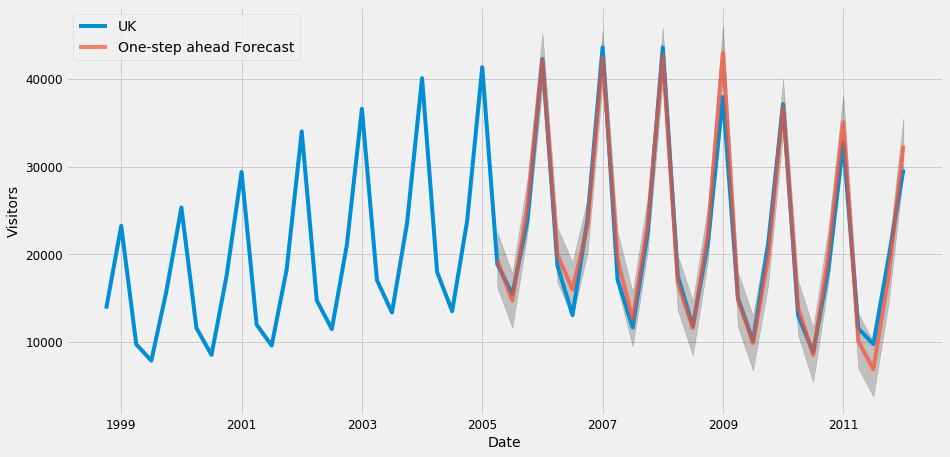

In [153]:
pred = results.get_prediction(start=pd.to_datetime('2005-04-01'), dynamic=False)

pred_ci = pred.conf_int()
ax = data['1998':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Visitors')
plt.legend()
plt.show()

In [145]:
y_forecasted = pred.predicted_mean
y_truth = data['2005-04-01':]

mse = (((y_forecasted) - list(y_truth['UK']))**2).mean()

#mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2996799.2
The Root Mean Squared Error of our forecasts is 1731.13


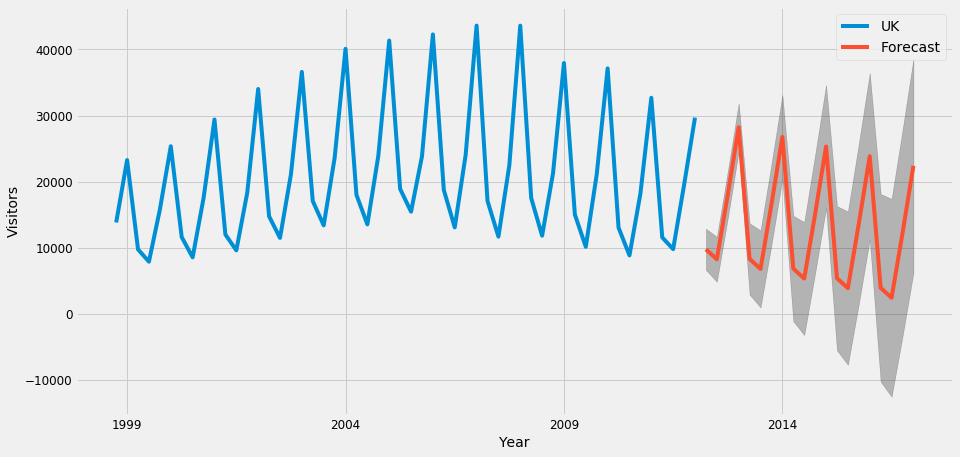

In [150]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Visitors')
plt.legend()
plt.show()